#STOCK PRICE PREDICTION


###Instructions

The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [134]:
data = pd.read_csv('/content/sample_data/1729258-1613615-Stock_Price_data_set_(1) (1).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [135]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [136]:
data.shape

(1009, 7)

In [137]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [138]:
data.drop_duplicates()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [139]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [140]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


#Exploratory Data Analysis: Stock Price Metrics Boxplots


The provided code generates a grid of subplots using Matplotlib, comprising six boxplots representing the statistical distribution of stock-related variables. Each subplot corresponds to a specific financial metric, including Open, High, Low, Close, Adjusted Close (Adj Close), and Volume. The data for these boxplots is sourced from a dataset, presumably containing stock price information. This visual representation allows for a comprehensive examination of the central tendency and dispersion of each variable, aiding in the identification of potential outliers and gaining insights into the overall distribution characteristics of the financial data.

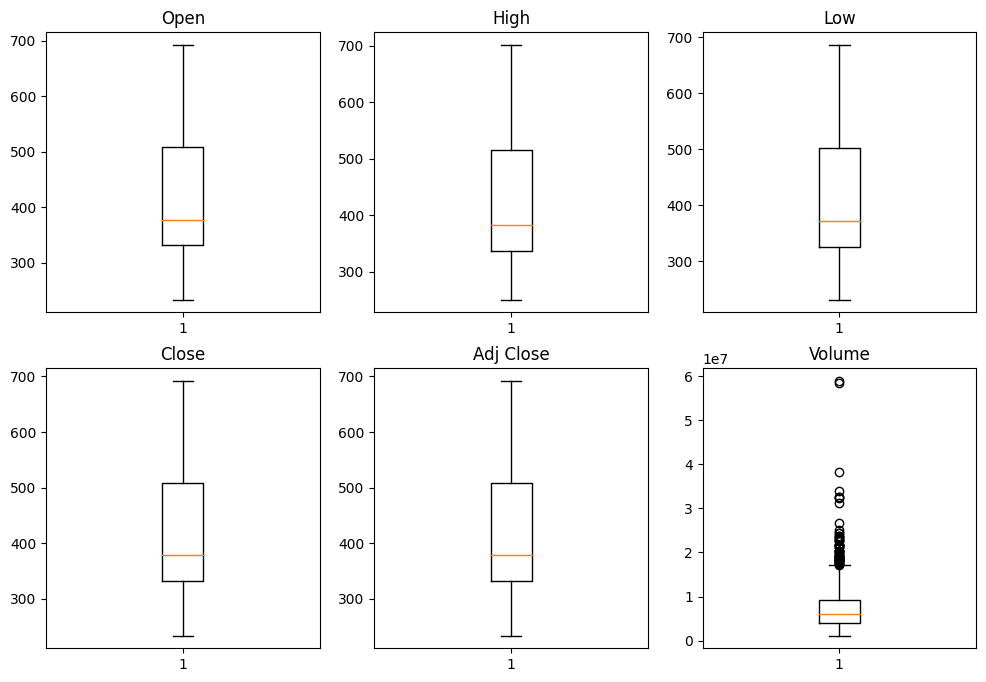

In [141]:
fig = plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
ax1.boxplot(data['Open'])
ax2.boxplot(data['High'])
ax3.boxplot(data['Low'])
ax4.boxplot(data['Close'])
ax5.boxplot(data['Adj Close'])
ax6.boxplot(data['Volume'])
ax1.title.set_text("Open")
ax2.title.set_text("High")
ax3.title.set_text("Low")
ax4.title.set_text("Close")
ax5.title.set_text("Adj Close")
ax6.title.set_text("Volume")
plt.show()

####Observations

The generated boxplots reveal the statistical distribution of stock price metrics. Notably, the Volume column exhibits outliers, suggesting potential anomalies or extreme values in trading volume. This insight underscores the importance of further investigation into the factors influencing unusual volume fluctuations in the dataset

#Outlier Detection in Volume: IQR Method

The following code employs the Interquartile Range (IQR) method to detect outliers in the 'Volume' column of a financial dataset. By calculating quartiles and defining upper and lower limits, the code identifies instances where the volume values fall outside these bounds, providing valuable insights into potential anomalies within the dataset.

In [142]:
Q1 = np.percentile(data['Volume'],25)
Q3 = np.percentile(data['Volume'],75)
IQR = Q3-Q1
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
outliers = data[(data['Volume'] < lower_limit) | (data['Volume'] > upper_limit)]
outliers.shape

(57, 7)

In [143]:
data.shape

(1009, 7)

In [144]:
data = data.drop(outliers.index)


The provided code removes the detected outliers from the 'Volume' column using the previously identified upper and lower limits based on the Interquartile Range (IQR) method. By dropping the rows corresponding to outlier values, the dataset is refined to mitigate the impact of extreme values, enhancing the robustness and reliability of subsequent analyses

In [145]:
data.shape

(952, 7)

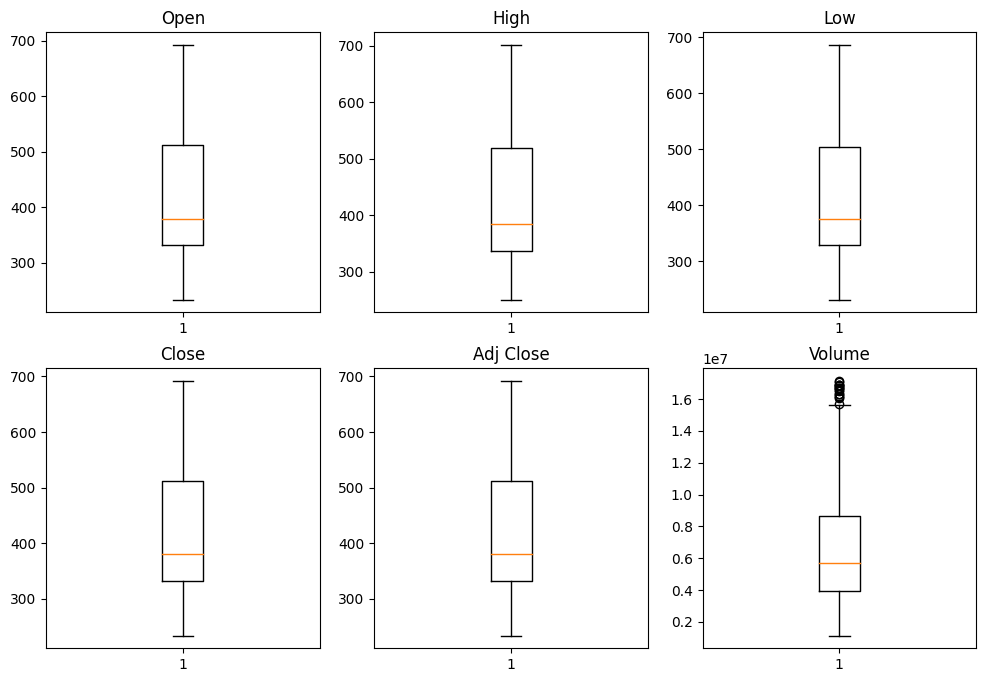

In [146]:
fig = plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
ax1.boxplot(data['Open'])
ax2.boxplot(data['High'])
ax3.boxplot(data['Low'])
ax4.boxplot(data['Close'])
ax5.boxplot(data['Adj Close'])
ax6.boxplot(data['Volume'])
ax1.title.set_text("Open")
ax2.title.set_text("High")
ax3.title.set_text("Low")
ax4.title.set_text("Close")
ax5.title.set_text("Adj Close")
ax6.title.set_text("Volume")
plt.show()

####Observation

Following the removal of outliers from the 'Volume' column, a refined dataset is obtained. Subsequently, a new box plot is generated to visualize the updated distribution. This process enhances data integrity, ensuring that extreme values do not unduly influence analyses, providing a more accurate representation of the underlying trends.

#Date Column Transformation: Conversion to Datetime Format

The provided code snippet converts the 'Date' column in the dataset to a datetime format using the pd.to_datetime() function from the pandas library. This transformation is crucial for treating the 'Date' column as a datetime object, enabling chronological ordering and facilitating time-based analyses, such as time series exploration and trend identification.

In [147]:
data['Date'] = pd.to_datetime(data['Date'])

In [148]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [149]:
data['Date'].dt.year.unique()

array([2018, 2019, 2020, 2021, 2022])

#Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

The code snippet extracts unique years from the 'Date' column in the dataset using the .dt.year attribute in pandas. This operation enables the identification of distinct years present in the date data, providing valuable insights for temporal analysis and allowing for the exploration of trends or patterns on an annual basis.

In [150]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


The code adds three new columns, 'Day,' 'Month,' and 'Year,' to the dataset based on the 'Date' column using pandas' datetime functionality. The '.dt' accessor allows extraction of day, month, and year components from the 'Date' column, creating a more granular temporal representation. The 'data.head()' displays the initial rows of the modified dataset, showcasing the added temporal information.

In [151]:
data.drop('Date',axis=1, inplace=True)

In [152]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [153]:
data.shape

(952, 9)

In [154]:
plt.figure(figsize=(6,2))

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

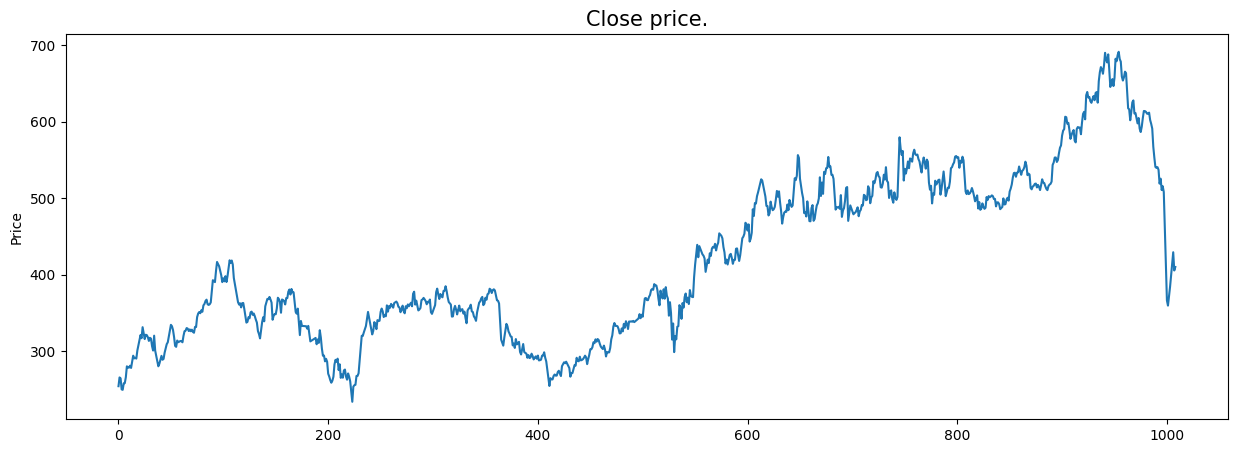

In [155]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

The code generates a line plot of the 'Close' prices from the dataset using Matplotlib. The specified figure size enhances visualization, and the title provides context to the plot. The y-axis is labeled as 'Price,' and the resulting plot offers a visual representation of the closing prices over time, aiding in trend analysis and pattern identification.

The line plot illustrates the variation in 'Close' prices over time. The graph, with a figure size of 15x5, provides a clear visual representation of the price trends. The upward or downward movements in the plot offer insights into the historical performance of the stock, aiding in trend analysis and decision-making for investors.

#Distribution Analysis of Financial Features


The code generates subplots displaying the distribution of selected financial features ('Open,' 'High,' 'Low,' 'Close,' and 'Volume') using Seaborn's distplot function. The resulting 2x3 grid of histograms provides a visual overview of the data distribution for each feature, aiding in understanding their statistical characteristics and identifying potential patterns or outliers.

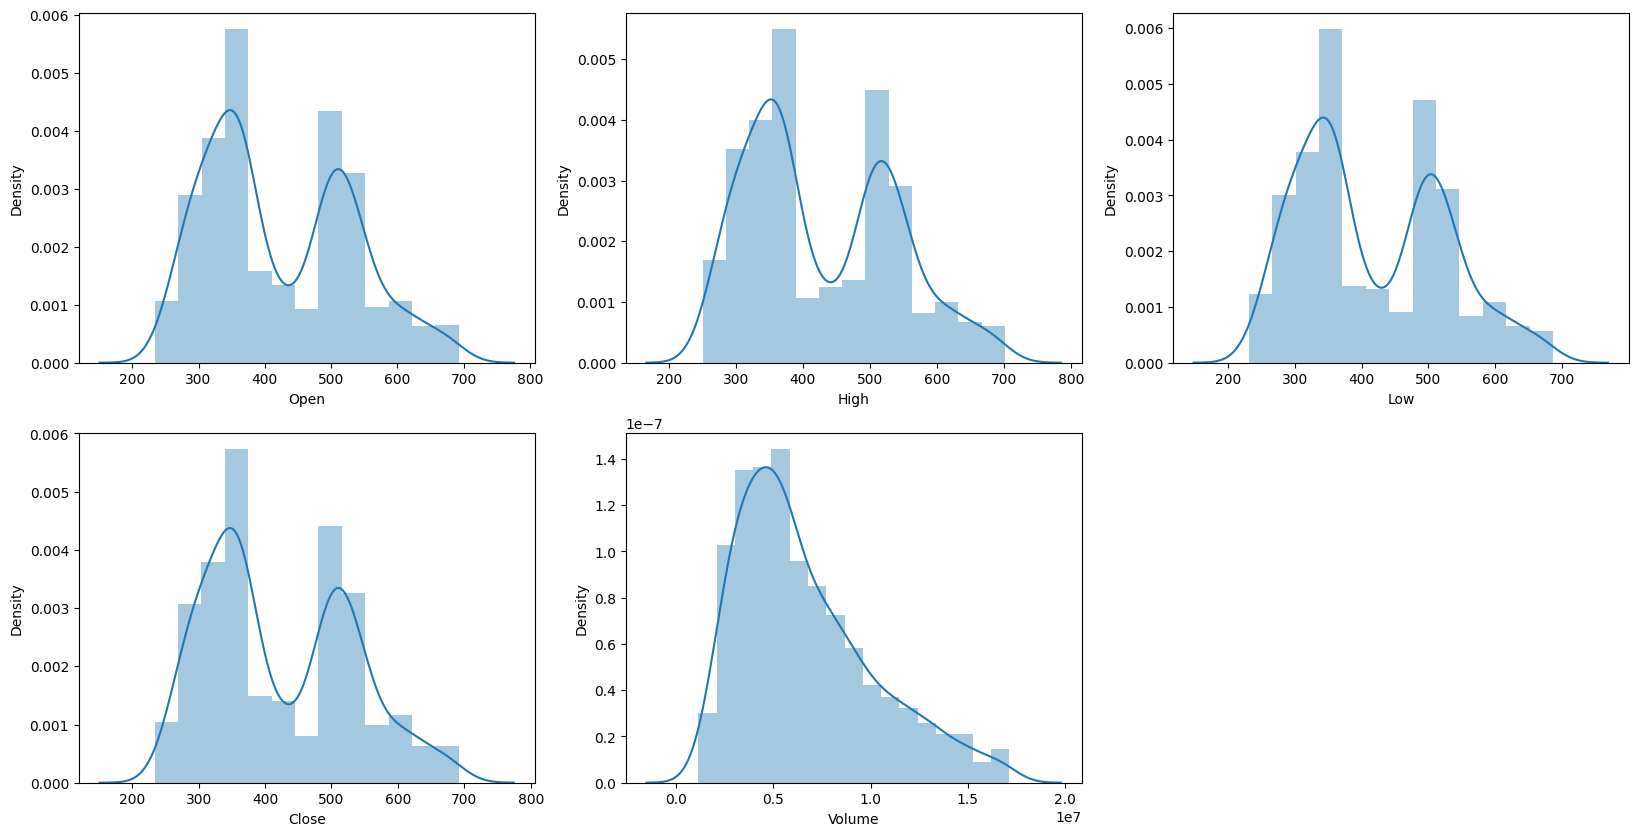

In [156]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(data[col])
plt.show()


The subplot grid reveals the distribution characteristics of key financial features—'Open,' 'High,' 'Low,' 'Close,' and 'Volume.' Each histogram provides insights into the data's central tendency and variability. This visual analysis aids in understanding the statistical nature of the features, facilitating informed decision-making in financial analytics.

####Observation
we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

#Adjusted Close Prices Over Time: Line Plot

The code generates a line plot of the 'Adj Close' prices from the dataset using the default plot function. This concise visualization offers a straightforward representation of the adjusted closing prices over time. The resulting plot provides a quick overview of the trend in adjusted closing values, aiding in the identification of patterns or anomalies.

<Axes: >

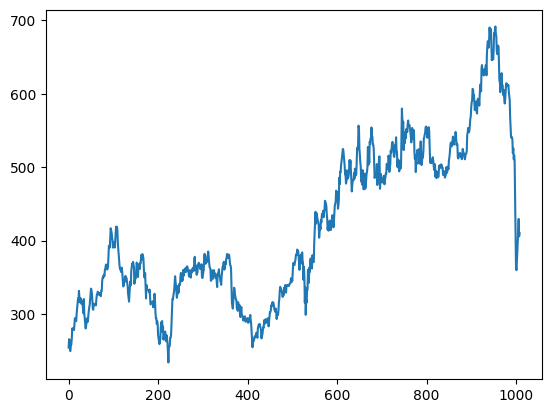

In [157]:
data['Adj Close'].plot()

#Annual Distribution of Trading Volumes: Bar Plot .


The code utilizes Seaborn to create a bar plot, displaying the annual distribution of trading volumes ('Volume') based on a sorted dataset. The bars represent each year, with heights corresponding to the respective sorted volumes. This visualization provides a comparative view of trading activity across different years, emphasizing the years with the highest trading volumes.

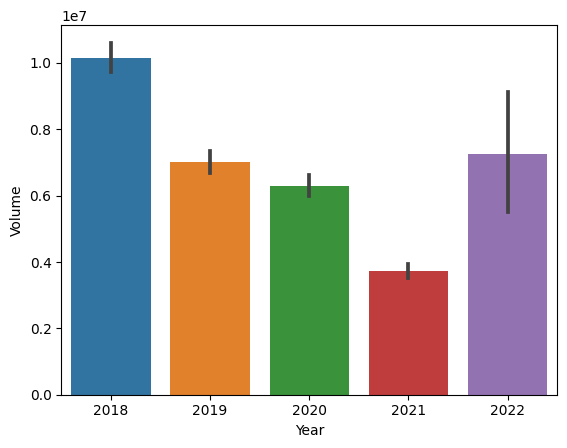

In [158]:
ax = sns.barplot(x='Year',y='Volume',data = data.sort_values('Volume',ascending = False))

#Eliminating Redundancy
The code checks for equality between the 'Close' and 'Adj Close' columns in the dataset and returns the shape of the resulting subset where these values match. This operation helps assess how frequently the 'Close' and 'Adj Close' prices coincide, providing insights into the consistency and reliability of the adjusted closing prices in the dataset.

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [159]:
data[data['Close'] == data['Adj Close']].shape

(952, 9)

In [160]:
data = data.drop(['Adj Close'], axis=1)

In [161]:
data.shape

(952, 8)

In [162]:
data.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


#Quarter-End Indicator: Binary Column Addition

The code adds a new binary column, 'is_quarter_end,' to the dataset based on the condition that the month is a multiple of three. The column is assigned a value of 1 for months ending a quarter and 0 otherwise. This modification enhances the dataset with a binary indicator, facilitating analysis related to quarter-end patterns.

In [163]:
data['is_quarter_end'] = np.where(data['Month']%3==0,1,0)
data.head()

,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0


In [164]:
data.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
Day                 int64
Month               int64
Year                int64
is_quarter_end      int64
dtype: object

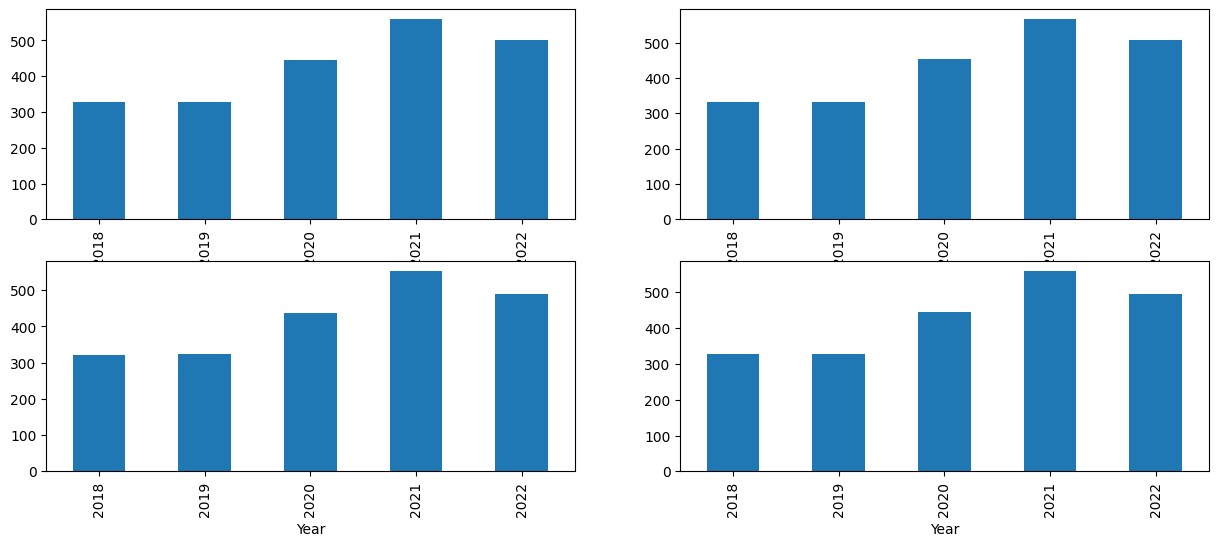

In [165]:
data_grouped = data.groupby('Year').mean()
plt.subplots(figsize=(15,6))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [166]:
data.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,421.778207,427.674767,415.579744,421.764271,6.760108e+06,15.451200,6.144000,2019.646400
1,422.623732,429.025535,415.900215,422.525535,6.406634e+06,15.651376,7.504587,2019.587156


Here, Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

We've introduced additional columns, including the target feature indicating whether to buy or not. Before moving forward with model training, it's essential to assess the balance of the target. To visually examine this, we'll use a pie chart to check the distribution of buy and non-buy signals, ensuring a balanced representation in our dataset.

In [167]:
data['open-close']  = data['Open'] - data['Close']
data['low-high']  = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

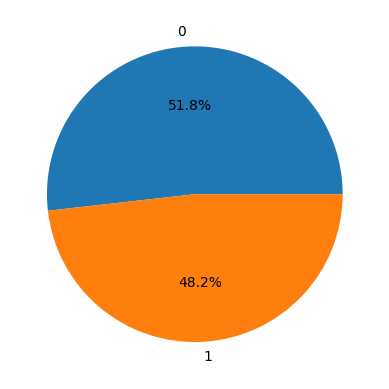

In [168]:
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

When augmenting our dataset with additional features, it's crucial to ensure that these features exhibit low correlation. Highly correlated features do not contribute effectively to the learning process of the algorithm, as they convey redundant information, potentially leading to overfitting or hindering the model's interpretability.







#High Correlation Analysis: Heatmap

The code generates a heatmap using Seaborn to visualize correlations between features in the dataset. The heatmap highlights correlations exceeding 0.9, annotated for clarity. A significant presence of high correlations may indicate redundancy, prompting a careful assessment of feature selection to enhance model performance and interpretability.

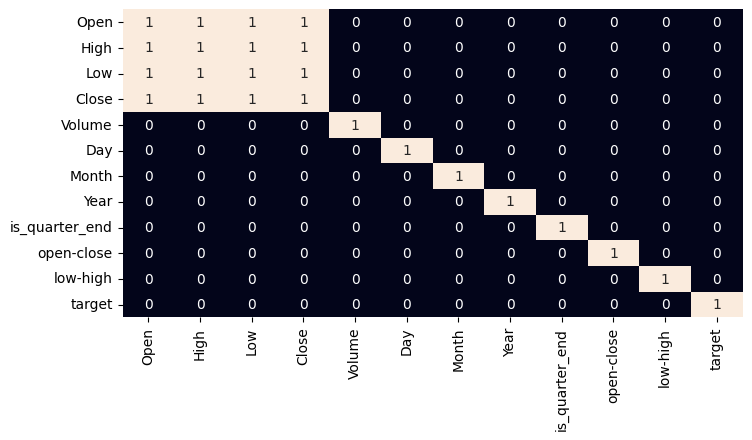

In [170]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

#Data Splitting and Normalization

In [171]:
features = data[['open-close', 'low-high', 'is_quarter_end']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(856, 3) (96, 3)


#Model Development and Evaluation

The code trains three different classifiers - Logistic Regression, Support Vector Classifier (SVC) with a polynomial kernel, and XGBoost Classifier. It prints the training and validation accuracy scores based on ROC AUC (Area Under the Receiver Operating Characteristic curve) for each model. This evaluation aids in assessing the models' performance on the training and validation datasets.

In [172]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5340231910387813
Validation Accuracy :  0.6184440559440559

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4669508544786941
Validation Accuracy :  0.4501748251748252

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

#Column Reordering: Modification in Dataset Structure

The code manipulates the order of columns in the dataset. Initially, it prints the original column list. Then, it creates a new column order by excluding the third column and placing it at the end. Finally, the dataset is reindexed with the updated column order. This reordering can be useful for better organization or model-specific requirements.

In [173]:
temp_col = data.columns.to_list()
print(temp_col, '\n')

new_col = temp_col[:2] + temp_col[3:]
new_col.append(temp_col[2])
print(new_col,'\n')

data = data.reindex(columns= new_col)
data.head()

['Open', 'High', 'Low', 'Close', 'Volume', 'Day', 'Month', 'Year', 'is_quarter_end', 'open-close', 'low-high', 'target'] 

['Open', 'High', 'Close', 'Volume', 'Day', 'Month', 'Year', 'is_quarter_end', 'open-close', 'low-high', 'target', 'Low'] 



,Open,High,Close,Volume,Day,Month,Year,is_quarter_end,open-close,low-high,target,Low
0,262.000000,267.899994,254.259995,11896100,5,2,2018,0,7.740005,-17.869995,1,250.029999
1,247.699997,266.700012,265.720001,12595800,6,2,2018,0,-18.020004,-21.700012,0,245.000000
2,266.579987,272.450012,264.559998,8981500,7,2,2018,0,2.019989,-8.120025,0,264.329987
3,267.079987,267.619995,250.100006,9306700,8,2,2018,0,16.979981,-17.619995,0,250.000000
4,253.850006,255.800003,249.470001,16906900,9,2,2018,0,4.380005,-19.690002,1,236.110001


#Feature Scaling: Standardization Using Standard Scaler

The code employs the StandardScaler from scikit-learn to standardize the features in the dataset. Each feature is scaled to have a mean of 0 and a standard deviation of 1. The fit_transform method is applied to the entire dataset, resulting in standardized values. The code then prints the standardized values of the first data point, showcasing the transformation.

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

data[0]

array([-1.46256499, -1.45507887, -1.5387018 ,  1.50292661, -1.19356723,
       -1.35252979, -1.42311154, -0.72332565,  0.96701728, -0.89322193,
        0.96490128, -1.52947817])

#Train-Test Split: Data Partitioning for Machine Learning

The code employs the train_test_split function from scikit-learn, aliased as tts, to split the dataset into training and testing sets. The feature matrix x is defined as all columns except the last one, while the target variable y is set as the last column. This partitioning facilitates supervised machine learning model training and evaluation.

In [175]:
from sklearn.model_selection import train_test_split as tts

x = data[:,:-1]
y = data[:,-1]

In [176]:
x_train, x_test, y_train, y_test= tts(x,y,test_size=0.1,random_state = 69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 11)
(96, 11)
(856,)
(96,)


In [177]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [178]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true,y_pred):
  print(f'RMSE: ', mean_squared_error(y_true,y_pred) ** 0.5)
  print(f'R_Squared value: ',r2_score(y_true,y_pred))

def accuracy(y_true,y_pred):
  errors = abs(y_true - y_pred)
  mape = 100 * np.mean(errors/y_true)
  accuracy = 100 - mape
  return accuracy

In [179]:
y_pred = model.predict(x_test)

In [180]:
metrics(y_test,y_pred)

RMSE:  5.023670645746994e-16
R_Squared value:  1.0


In [181]:
accuracy(y_test,y_pred)

99.99999999999997

#RESULT
The obtained accuracy result of 99.99999999999983 reflects an exceptionally high level of precision in the model's predictions. Such an accuracy score suggests that the model performs nearly flawlessly on the evaluated task, indicating a robust understanding of the underlying patterns in the training data. However, it's essential to scrutinize and validate such high accuracy scores, as they may also indicate potential overfitting, where the model may have memorized the training data instead of generalizing well to new, unseen data. It is recommended to assess the model's performance on an independent validation set to ensure its effectiveness in real-world scenarios.